In [1]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')

In [2]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/"
errordatdir="../ERRORCALC/VWIND/DATA/"

In [3]:
cmip5 = xr.open_dataset(datdir+"cmip5vwindindices.nc")
cmip6 = xr.open_dataset(datdir+"cmip6vwindindices.nc")
cmip5pr = xr.open_dataset(datdir+"cmip5vwind_prdata.nc")
cmip6pr = xr.open_dataset(datdir+"cmip6vwind_prdata.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")

In [114]:
print(error1mem)

<xarray.Dataset>
Dimensions:          ()
Data variables:
    sig_vdiff        float64 ...
    sig_psi          float64 ...
    sig_udiff        float64 ...
    sig_pdiff_west   float64 ...
    sig_pdiff_south  float64 ...
    sig_pdiff_mex    float64 ...
    r_psi_vdiff      float64 ...
    r_udiff_vdiff    float64 ...
    r_psi_prwest     float64 ...
    r_psi_prsouth    float64 ...
    r_psi_prmex      float64 ...
    ivmin95          float64 ...
    ivmax95          float64 ...
    ivmin95west      float64 -0.4772
    ivmax95west      float64 ...
    ivmin95south     float64 ...
    ivmax95south     float64 ...
    ivmin95mex       float64 ...
    ivmax95mex       float64 ...


In [4]:
cmip56 = xr.concat([cmip5, cmip6], "Model")
errorem56 = xr.concat([errorem5, errorem6], "Model")
cmip56pr = xr.concat([cmip5pr, cmip6pr], "Model")

In [5]:
obsdata=xr.open_dataset(datdir+"vampobs.nc")
vampobs=np.zeros([4])
vampobs[0]=obsdata.vamp_era5 ; vampobs[1]=obsdata.vamp_erai
vampobs[2]=obsdata.vamp_jra ; vampobs[3]=obsdata.vamp_merra

U.S. West 

In [6]:
cmip5ols_west = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prwest_f_1mem']-cmip5pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem5['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='OLS')

cmip5tls_west = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prwest_f_1mem']-cmip5pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem5['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='TLS')

cmip5bhm_west = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prwest_f_1mem']-cmip5pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem5['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='BHM')


cmip6ols_west = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prwest_f_1mem']-cmip6pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem6['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='OLS')

cmip6tls_west = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prwest_f_1mem']-cmip6pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem6['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='TLS')

cmip6bhm_west = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prwest_f_1mem']-cmip6pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem6['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='BHM')

cmip56ols_west = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prwest_f_1mem']-cmip56pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem56['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='OLS')

cmip56tls_west = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prwest_f_1mem']-cmip56pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem56['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='TLS')

cmip56bhm_west = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prwest_f_1mem']-cmip56pr['prwest_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_west'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_west'], 
                                           rxyem=errorem56['r_psi_prwest'],rxy1mem=error1mem['r_psi_prwest'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater 

In [7]:
cmip5ols_south = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prsouth_f_1mem']-cmip5pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem5['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='OLS')

cmip5tls_south = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prsouth_f_1mem']-cmip5pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem5['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='TLS')

cmip5bhm_south = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prsouth_f_1mem']-cmip5pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem5['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='BHM')


cmip6ols_south = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prsouth_f_1mem']-cmip6pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem6['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='OLS')

cmip6tls_south = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prsouth_f_1mem']-cmip6pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem6['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='TLS')

cmip6bhm_south = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prsouth_f_1mem']-cmip6pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem6['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='BHM')

cmip56ols_south = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prsouth_f_1mem']-cmip56pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem56['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='OLS')

cmip56tls_south = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prsouth_f_1mem']-cmip56pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem56['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='TLS')

cmip56bhm_south = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prsouth_f_1mem']-cmip56pr['prsouth_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_south'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_south'], 
                                           rxyem=errorem56['r_psi_prsouth'],rxy1mem=error1mem['r_psi_prsouth'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater 

In [8]:
cmip5ols_mex = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prmex_f_1mem']-cmip5pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem5['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='OLS')

cmip5tls_mex = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prmex_f_1mem']-cmip5pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem5['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='TLS')

cmip5bhm_mex = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], cmip5['vpastamp_1mem'], 
                                           cmip5pr['prmex_f_1mem']-cmip5pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem5['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='BHM')


cmip6ols_mex = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prmex_f_1mem']-cmip6pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem6['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='OLS')

cmip6tls_mex = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prmex_f_1mem']-cmip6pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem6['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='TLS')

cmip6bhm_mex = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], cmip6['vpastamp_1mem'], 
                                           cmip6pr['prmex_f_1mem']-cmip6pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem6['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='BHM')

cmip56ols_mex = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prmex_f_1mem']-cmip56pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem56['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='OLS')

cmip56tls_mex = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prmex_f_1mem']-cmip56pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem56['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='TLS')

cmip56bhm_mex = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], cmip56['vpastamp_1mem'], 
                                           cmip56pr['prmex_f_1mem']-cmip56pr['prmex_p_1mem'],vampobs, 
                                           sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_pdiff_mex'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_pdiff_mex'], 
                                           rxyem=errorem56['r_psi_prmex'],rxy1mem=error1mem['r_psi_prmex'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater 

In [9]:
aols_west, bols_west = linfit.linfit_xy(cmip56['vpastamp_em'], cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], sigma=errorem56['sig_pdiff_west'])
atls_west, btls_west = linfit.tls(cmip56['vpastamp_em'], cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_west'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['vpastamp_em'], cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_west'], 
                                                         errorem56['r_psi_prwest'], iseed=3)
abhm_west = np.mean(abhmall) ; bbhm_west = np.mean(bbhmall)

aols_south, bols_south = linfit.linfit_xy(cmip56['vpastamp_em'], cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], sigma=errorem56['sig_pdiff_south'])
atls_south, btls_south = linfit.tls(cmip56['vpastamp_em'], cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_south'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['vpastamp_em'], cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_south'], 
                                                         errorem56['r_psi_prsouth'], iseed=3)
abhm_south = np.mean(abhmall) ; bbhm_south = np.mean(bbhmall)

aols_mex, bols_mex = linfit.linfit_xy(cmip56['vpastamp_em'], cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], sigma=errorem56['sig_pdiff_mex'])
atls_mex, btls_mex = linfit.tls(cmip56['vpastamp_em'], cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_mex'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['vpastamp_em'], cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], errorem56['sig_psi'], errorem56['sig_pdiff_mex'], 
                                                         errorem56['r_psi_prmex'], iseed=3)
abhm_mex = np.mean(abhmall) ; bbhm_mex = np.mean(bbhmall)



US West coast

64.48006213333333
60.775668700000004
58.03411003333333


Text(1, -1.25, '0.52')

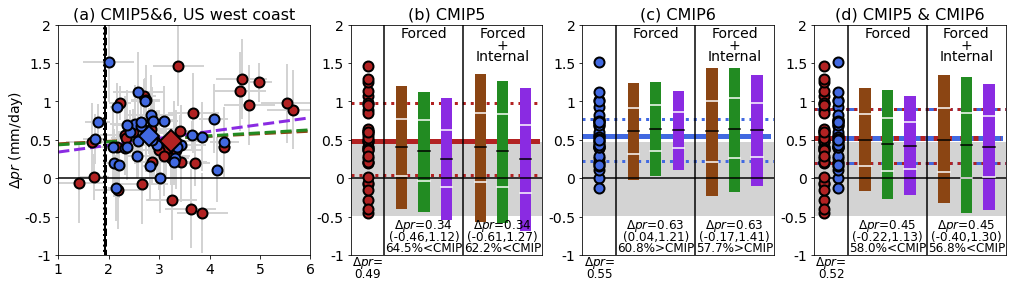

In [10]:
fig = plt.figure()
fig.set_size_inches(14, 16)

ylim=(-1,2)

#### panel A

ax1 = fig.add_axes(np.array([0.05, 0.8, 0.25, 0.2]))
ax1.set_xlim(1,6) ; ax1.set_ylim(ylim)
ax1.set_xticks([1,2,3,4,5,6]) ; ax1.set_xticklabels(['1','2','3','4','5','6'], fontsize=14)
ax1.set_yticks([-1,-0.5,0,0.5,1,1.5,2]) ; ax1.set_yticklabels(['-1','-0.5','0','0.5','1','1.5','2'], fontsize=14)
ax1.set_ylabel('$\Delta pr$ (mm/day)', fontsize=14, labelpad=-1)
ax1.set_title('(a) CMIP5&6, US west coast', fontsize=16)

x = np.arange(1,7,1)
ax1.plot(x,x*0, color='black')
y = aols_west + bols_west*x
ax1.plot(x,y, color='saddlebrown', linewidth=3, linestyle="dashed")
y = atls_west + btls_west*x
ax1.plot(x,y, color='forestgreen', linewidth=3, linestyle="dashed")
y = abhm_west + bbhm_west*x
ax1.plot(x,y, color='blueviolet', linewidth=3, linestyle="dashed")

# observed values
ax1.plot([obsdata["vamp_era5"], obsdata["vamp_era5"]],[-10,2], color="black", linewidth=2)
ax1.plot([obsdata["vamp_erai"], obsdata["vamp_erai"]],[-10,2], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["vamp_jra"], obsdata["vamp_jra"]],[-10,2], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["vamp_merra"], obsdata["vamp_merra"]],[-10,2],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['vpastamp_em'],cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['vpastamp_em'],cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['vpastamp_em'].mean(), cmip5pr['prwest_f_em'].mean()-cmip5pr['prwest_p_em'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=15, markeredgewidth=2)
ax1.plot(cmip6['vpastamp_em'].mean(), cmip6pr['prwest_f_em'].mean()-cmip6pr['prwest_p_em'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=14, markeredgewidth=2)

yerr5 = 1.96*errorem5['sig_pdiff_west'] ; yerr6 = 1.96*errorem6['sig_pdiff_west']
xerr5 = 1.96*errorem5['sig_psi'] ; xerr6 = 1.96*errorem6['sig_psi']

ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)




####panel B
ax2 = fig.add_axes(np.array([0.34, 0.8, 0.19, 0.2]))
ax2.set_xlim(-0.5,16.5) ; ax2.set_ylim(ylim)
ax2.set_yticks([-1,-0.5,0,0.5,1,1.5,2]) ; ax2.set_yticklabels(['-1','-0.5','0','0.5','1','1.5','2'], fontsize=14)
ax2.set_xticks([])
ax2.set_title('(b) CMIP5', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95west']), 17, error1mem['ivmax95west']-error1mem['ivmin95west'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black')
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols_west, cmip5tls_west, cmip5bhm_west, ylim, "$\Delta pr$", toplabel=True)
ax2.plot(np.zeros([cmip5.Model.size])+1, cmip5pr['prwest_f_em'] - cmip5pr['prwest_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([-0.5,16],[cmip5pr['prwest_f_em'].mean()-cmip5pr['prwest_p_em'].mean(), cmip5pr['prwest_f_em'].mean()-cmip5pr['prwest_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5)
min66 = np.percentile(cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], 17)
max66 = np.percentile(cmip5pr['prwest_f_em']-cmip5pr['prwest_p_em'], 83)
ax2.plot([-0.5,16.5],[min66,min66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66,max66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip5pr['prwest_f_em'].mean()-cmip5pr['prwest_p_em']).mean(), 2))
ax2.text(1, -1.1,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax2.text(1,-1.25, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
###########

####panel C
ax3 = fig.add_axes(np.array([0.57, 0.8, 0.19, 0.2]))
ax3.set_xlim(-0.5,16.5) ; ax3.set_ylim(ylim)
ax3.set_yticks([-1,-0.5,0,0.5,1,1.5,2]) ; ax3.set_yticklabels(['-1','-0.5','0','0.5','1','1.5','2'], fontsize=14)
ax3.set_xticks([])
ax3.set_title('(c) CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95west']), 17, error1mem['ivmax95west']-error1mem['ivmin95west'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black')
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols_west, cmip6tls_west, cmip6bhm_west, ylim, "$\Delta pr$", toplabel=True)
ax3.plot(np.zeros([cmip6.Model.size])+1, cmip6pr['prwest_f_em'] - cmip6pr['prwest_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax3.plot([-0.5,16],[cmip6pr['prwest_f_em'].mean()-cmip6pr['prwest_p_em'].mean(), cmip6pr['prwest_f_em'].mean()-cmip6pr['prwest_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
min66 = np.percentile(cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], 17)
max66 = np.percentile(cmip6pr['prwest_f_em']-cmip6pr['prwest_p_em'], 83)
ax3.plot([-0.5,16.5],[min66,min66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66,max66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip6pr['prwest_f_em'].mean()-cmip6pr['prwest_p_em']).mean(), 2))
ax3.text(1, -1.1,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax3.text(1,-1.25, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')




ax4 = fig.add_axes(np.array([0.8, 0.8, 0.19, 0.2]))
ax4.set_xlim(-0.5,16.5) ; ax4.set_ylim(ylim)
ax4.set_yticks([-1,-0.5,0,0.5,1,1.5,2]) ; ax4.set_yticklabels(['-1','-0.5','0','0.5','1','1.5','2'], fontsize=14)
ax4.set_xticks([])
ax4.set_title('(d) CMIP5 & CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95west']), 17, error1mem['ivmax95west']-error1mem['ivmin95west'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black')
ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols_west, cmip56tls_west, cmip56bhm_west, ylim, "$\Delta pr$", toplabel=True)
ax4.plot(np.zeros([cmip5.Model.size])+0.4, cmip5pr['prwest_f_em'] - cmip5pr['prwest_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)
ax4.plot(np.zeros([cmip6.Model.size])+1.6, cmip6pr['prwest_f_em'] - cmip6pr['prwest_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)

ax4.plot([-0.5,16],[cmip56pr['prwest_f_em'].mean()-cmip56pr['prwest_p_em'].mean(), cmip56pr['prwest_f_em'].mean()-cmip56pr['prwest_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.5,16],[cmip56pr['prwest_f_em'].mean()-cmip56pr['prwest_p_em'].mean(), cmip56pr['prwest_f_em'].mean()-cmip56pr['prwest_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
min66 = np.percentile(cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], 17)
max66 = np.percentile(cmip56pr['prwest_f_em']-cmip56pr['prwest_p_em'], 83)
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip56pr['prwest_f_em'].mean()-cmip56pr['prwest_p_em']).mean(), 2))
ax4.text(1, -1.1,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax4.text(1,-1.25, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')




US south

In [11]:
#fig = plt.figure()
#fig.set_size_inches(14, 16)

ylim=(-1,1)

#### panel E

ax1 = fig.add_axes(np.array([0.05, 0.55, 0.25, 0.2]))
ax1.set_xlim(1,6) ; ax1.set_ylim(ylim)
ax1.set_xticks([1,2,3,4,5,6]) ; ax1.set_xticklabels(['1','2','3','4','5','6'], fontsize=14)
ax1.set_yticks([-1,-0.5,0,0.5,1]) ; ax1.set_yticklabels(['-1','-0.5','0','0.5','1'], fontsize=14)
ax1.set_ylabel('$\Delta pr$ (mm/day)', fontsize=14, labelpad=-1)
ax1.set_title('(e) CMIP5&6, US south', fontsize=16)

x = np.arange(1,7,1)
ax1.plot(x,x*0, color='black')
y = aols_south + bols_south*x
ax1.plot(x,y, color='saddlebrown', linewidth=3, linestyle="dashed")
y = atls_south + btls_south*x
ax1.plot(x,y, color='forestgreen', linewidth=3, linestyle="dashed")
y = abhm_south + bbhm_south*x
ax1.plot(x,y, color='blueviolet', linewidth=3, linestyle="dashed")

# observed values
ax1.plot([obsdata["vamp_era5"], obsdata["vamp_era5"]],[-10,2], color="black", linewidth=2)
ax1.plot([obsdata["vamp_erai"], obsdata["vamp_erai"]],[-10,2], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["vamp_jra"], obsdata["vamp_jra"]],[-10,2], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["vamp_merra"], obsdata["vamp_merra"]],[-10,2],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['vpastamp_em'],cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['vpastamp_em'],cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['vpastamp_em'].mean(), cmip5pr['prsouth_f_em'].mean()-cmip5pr['prsouth_p_em'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=15, markeredgewidth=2)
ax1.plot(cmip6['vpastamp_em'].mean(), cmip6pr['prsouth_f_em'].mean()-cmip6pr['prsouth_p_em'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=14, markeredgewidth=2)

yerr5 = 1.96*errorem5['sig_pdiff_south'] ; yerr6 = 1.96*errorem6['sig_pdiff_south']
xerr5 = 1.96*errorem5['sig_psi'] ; xerr6 = 1.96*errorem6['sig_psi']

ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)




####panel F
ax2 = fig.add_axes(np.array([0.34, 0.55, 0.19, 0.2]))
ax2.set_xlim(-0.5,16.5) ; ax2.set_ylim(ylim)
ax2.set_yticks([-1,-0.5,0,0.5,1]) ; ax2.set_yticklabels(['-1','-0.5','0','0.5','1'], fontsize=14)
ax2.set_xticks([])
ax2.set_title('(f) CMIP5', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95south']), 17, error1mem['ivmax95south']-error1mem['ivmin95south'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black')
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols_south, cmip5tls_south, cmip5bhm_south, ylim, "$\Delta pr$", toplabel=True)
ax2.plot(np.zeros([cmip5.Model.size])+1, cmip5pr['prsouth_f_em'] - cmip5pr['prsouth_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([-0.5,16],[cmip5pr['prsouth_f_em'].mean()-cmip5pr['prsouth_p_em'].mean(), cmip5pr['prsouth_f_em'].mean()-cmip5pr['prsouth_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5)
min66 = np.percentile(cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], 17)
max66 = np.percentile(cmip5pr['prsouth_f_em']-cmip5pr['prsouth_p_em'], 83)
ax2.plot([-0.5,16.5],[min66,min66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66,max66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip5pr['prsouth_f_em'].mean()-cmip5pr['prsouth_p_em']).mean(), 2))
ax2.text(1, -1.08,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax2.text(1,-1.19, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
###########

####panel G
ax3 = fig.add_axes(np.array([0.57, 0.55, 0.19, 0.2]))
ax3.set_xlim(-0.5,16.5) ; ax3.set_ylim(ylim)
ax3.set_yticks([-1,-0.5,0,0.5,1]) ; ax3.set_yticklabels(['-1','-0.5','0','0.5','1'], fontsize=14)
ax3.set_xticks([])
ax3.set_title('(g) CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95south']), 17, error1mem['ivmax95south']-error1mem['ivmin95south'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black')
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols_south, cmip6tls_south, cmip6bhm_south, ylim, "$\Delta pr$", toplabel=True)
ax3.plot(np.zeros([cmip6.Model.size])+1, cmip6pr['prsouth_f_em'] - cmip6pr['prsouth_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax3.plot([-0.5,16],[cmip6pr['prsouth_f_em'].mean()-cmip6pr['prsouth_p_em'].mean(), cmip6pr['prsouth_f_em'].mean()-cmip6pr['prsouth_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
min66 = np.percentile(cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], 17)
max66 = np.percentile(cmip6pr['prsouth_f_em']-cmip6pr['prsouth_p_em'], 83)
ax3.plot([-0.5,16.5],[min66,min66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66,max66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip6pr['prsouth_f_em'].mean()-cmip6pr['prsouth_p_em']).mean(), 2))
ax3.text(1, -1.08,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax3.text(1,-1.19, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')



##### panel H
ax4 = fig.add_axes(np.array([0.8, 0.55, 0.19, 0.2]))
ax4.set_xlim(-0.5,16.5) ; ax4.set_ylim(ylim)
ax4.set_yticks([-1,-0.5,0,0.5,1]) ; ax4.set_yticklabels(['-1','-0.5','0','0.5','1'], fontsize=14)
ax4.set_xticks([])
ax4.set_title('(h) CMIP5 & CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95south']), 17, error1mem['ivmax95south']-error1mem['ivmin95south'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black')
ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols_south, cmip56tls_south, cmip56bhm_south, ylim, "$\Delta pr$", toplabel=True)
ax4.plot(np.zeros([cmip5.Model.size])+0.4, cmip5pr['prsouth_f_em'] - cmip5pr['prsouth_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)
ax4.plot(np.zeros([cmip6.Model.size])+1.6, cmip6pr['prsouth_f_em'] - cmip6pr['prsouth_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)

ax4.plot([-0.5,16],[cmip56pr['prsouth_f_em'].mean()-cmip56pr['prsouth_p_em'].mean(), cmip56pr['prsouth_f_em'].mean()-cmip56pr['prsouth_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.5,16],[cmip56pr['prsouth_f_em'].mean()-cmip56pr['prsouth_p_em'].mean(), cmip56pr['prsouth_f_em'].mean()-cmip56pr['prsouth_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
min66 = np.percentile(cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], 17)
max66 = np.percentile(cmip56pr['prsouth_f_em']-cmip56pr['prsouth_p_em'], 83)
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip56pr['prsouth_f_em'].mean()-cmip56pr['prsouth_p_em']).mean(), 2))
ax4.text(1, -1.08,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax4.text(1,-1.19, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')




80.76683573333334
67.0497907
79.92297276666666


Text(1, -1.19, '0.02')

Southern Mexico

In [12]:
ylim=(-1.5,0.5)

#### panel I

ax1 = fig.add_axes(np.array([0.05, 0.3, 0.25, 0.2]))
ax1.set_xlim(1,6) ; ax1.set_ylim(ylim)
ax1.set_xticks([1,2,3,4,5,6]) ; ax1.set_xticklabels(['1','2','3','4','5','6'], fontsize=14)
ax1.set_yticks([-1.5,-1,-0.5,0,0.5]) ; ax1.set_yticklabels(['-1.5','-1','-0.5','0','0.5'], fontsize=14)
ax1.set_ylabel('$\Delta pr$ (mm/day)', fontsize=14, labelpad=-1)
ax1.set_title('(i) CMIP5&6, South Mexico', fontsize=16)

x = np.arange(1,7,1)
ax1.plot(x,x*0, color='black')
y = aols_mex + bols_mex*x
ax1.plot(x,y, color='saddlebrown', linewidth=3, linestyle="dashed")
y = atls_mex + btls_mex*x
ax1.plot(x,y, color='forestgreen', linewidth=3, linestyle="dashed")
y = abhm_mex + bbhm_mex*x
ax1.plot(x,y, color='blueviolet', linewidth=3, linestyle="dashed")

# observed values
ax1.plot([obsdata["vamp_era5"], obsdata["vamp_era5"]],[-10,2], color="black", linewidth=2)
ax1.plot([obsdata["vamp_erai"], obsdata["vamp_erai"]],[-10,2], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["vamp_jra"], obsdata["vamp_jra"]],[-10,2], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["vamp_merra"], obsdata["vamp_merra"]],[-10,2],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['vpastamp_em'],cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['vpastamp_em'],cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['vpastamp_em'].mean(), cmip5pr['prmex_f_em'].mean()-cmip5pr['prmex_p_em'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=15, markeredgewidth=2)
ax1.plot(cmip6['vpastamp_em'].mean(), cmip6pr['prmex_f_em'].mean()-cmip6pr['prmex_p_em'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=14, markeredgewidth=2)

yerr5 = 1.96*errorem5['sig_pdiff_mex'] ; yerr6 = 1.96*errorem6['sig_pdiff_mex']
xerr5 = 1.96*errorem5['sig_psi'] ; xerr6 = 1.96*errorem6['sig_psi']

ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['vpastamp_em'], cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)




####panel J
ax2 = fig.add_axes(np.array([0.34, 0.3, 0.19, 0.2]))
ax2.set_xlim(-0.5,16.5) ; ax2.set_ylim(ylim)
ax2.set_yticks([-1.5,-1,-0.5,0,0.5]) ; ax2.set_yticklabels(['-1.5','-1','-0.5','0','0.5'], fontsize=14)
ax2.set_xticks([])
ax2.set_title('(j) CMIP5', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95mex']), 17, error1mem['ivmax95mex']-error1mem['ivmin95mex'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black')
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols_mex, cmip5tls_mex, cmip5bhm_mex, ylim, "$\Delta pr$")
ax2.plot(np.zeros([cmip5.Model.size])+1, cmip5pr['prmex_f_em'] - cmip5pr['prmex_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([-0.5,16],[cmip5pr['prmex_f_em'].mean()-cmip5pr['prmex_p_em'].mean(), cmip5pr['prmex_f_em'].mean()-cmip5pr['prmex_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5)
min66 = np.percentile(cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], 17)
max66 = np.percentile(cmip5pr['prmex_f_em']-cmip5pr['prmex_p_em'], 83)
ax2.plot([-0.5,16.5],[min66,min66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66,max66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip5pr['prmex_f_em'].mean()-cmip5pr['prmex_p_em']).mean(), 2))
ax2.text(1, -1.58,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax2.text(1,-1.69, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
###########

####panel K
ax3 = fig.add_axes(np.array([0.57, 0.3, 0.19, 0.2]))
ax3.set_xlim(-0.5,16.5) ; ax3.set_ylim(ylim)
ax3.set_yticks([-1.5,-1,-0.5,0,0.5]) ; ax3.set_yticklabels(['-1.5','-1','-0.5','0','0.5'], fontsize=14)
ax3.set_xticks([])
ax3.set_title('(k) CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95mex']), 17, error1mem['ivmax95mex']-error1mem['ivmin95mex'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black')
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols_mex, cmip6tls_mex, cmip6bhm_mex, ylim, "$\Delta pr$")
ax3.plot(np.zeros([cmip6.Model.size])+1, cmip6pr['prmex_f_em'] - cmip6pr['prmex_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax3.plot([-0.5,16],[cmip6pr['prmex_f_em'].mean()-cmip6pr['prmex_p_em'].mean(), cmip6pr['prmex_f_em'].mean()-cmip6pr['prmex_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
min66 = np.percentile(cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], 17)
max66 = np.percentile(cmip6pr['prmex_f_em']-cmip6pr['prmex_p_em'], 83)
ax3.plot([-0.5,16.5],[min66,min66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66,max66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip6pr['prmex_f_em'].mean()-cmip6pr['prmex_p_em']).mean(), 2))
ax3.text(1, -1.58,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax3.text(1,-1.69, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')


####panel L

ax4 = fig.add_axes(np.array([0.8, 0.3, 0.19, 0.2]))
ax4.set_xlim(-0.5,16.5) ; ax4.set_ylim(ylim)
ax4.set_yticks([-1.5,-1,-0.5,0,0.5]) ; ax4.set_yticklabels(['-1.5','-1','-0.5','0','0.5'], fontsize=14)
ax4.set_xticks([])
ax4.set_title('(l) CMIP5 & CMIP6', fontsize=16)
ivrange = plt.Rectangle( (-0.5, error1mem['ivmin95mex']), 17, error1mem['ivmax95mex']-error1mem['ivmin95mex'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black')
ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols_mex, cmip56tls_mex, cmip56bhm_mex, ylim, "$\Delta pr$")
ax4.plot(np.zeros([cmip5.Model.size])+0.4, cmip5pr['prmex_f_em'] - cmip5pr['prmex_p_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)
ax4.plot(np.zeros([cmip6.Model.size])+1.6, cmip6pr['prmex_f_em'] - cmip6pr['prmex_p_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=10, markeredgewidth=2)

ax4.plot([-0.5,16],[cmip56pr['prmex_f_em'].mean()-cmip56pr['prmex_p_em'].mean(), cmip56pr['prmex_f_em'].mean()-cmip56pr['prmex_p_em'].mean()], 
         color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.5,16],[cmip56pr['prmex_f_em'].mean()-cmip56pr['prmex_p_em'].mean(), cmip56pr['prmex_f_em'].mean()-cmip56pr['prmex_p_em'].mean()], 
         color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
min66 = np.percentile(cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], 17)
max66 = np.percentile(cmip56pr['prmex_f_em']-cmip56pr['prmex_p_em'], 83)
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([2.5,2.5],[ylim[0],ylim[1]], color='black')
prdifstring = str(np.round(np.array(cmip56pr['prmex_f_em'].mean()-cmip56pr['prmex_p_em']).mean(), 2))
ax4.text(1, -1.58,'$\Delta pr$=', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax4.text(1,-1.69, prdifstring, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')




80.25831973333334
74.20612256666668
79.3210806


Text(1, -1.69, '-0.34')

In [13]:
# the legend
legendparts=[Rectangle((0.95,0.95),5,3,facecolor='saddlebrown'),
             Rectangle((0.95,0.95),5,3,facecolor='forestgreen'),
             Rectangle((0.95,0.95),5,3,facecolor='blueviolet')]

legendlabels=['OLS','TLS','BHM']
fig.legend(legendparts, legendlabels, bbox_to_anchor=(0.78, 0.28), ncol=3, frameon=False, fontsize='x-large', handlelength=1, handleheight=1, handletextpad=0.4)

In [14]:
fig.patch.set_facecolor('white')
fig
fig.savefig('fig12.png', facecolor='white', bbox_inches='tight')